--- Data Loaded Successfully ---

Total records for trend analysis: 7779
Data spans from 2008 to 2021

--- Starting Genre Trends Analysis (Objective 2) ---

Top 10 Most Common Genres (Overall):
| Genre                    | Count   |
|:-------------------------|:--------|
| International Movies     | 2437    |
| Dramas                   | 2108    |
| Comedies                 | 1472    |
| International TV Shows   | 1198    |
| Documentaries            | 786     |
| Action & Adventure       | 721     |
| TV Dramas                | 703     |
| Independent Movies       | 675     |
| Children & Family Movies | 532     |
| Romantic Movies          | 531     |


/tmp/ipython-input-3989882446.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=top_genres, palette='viridis')


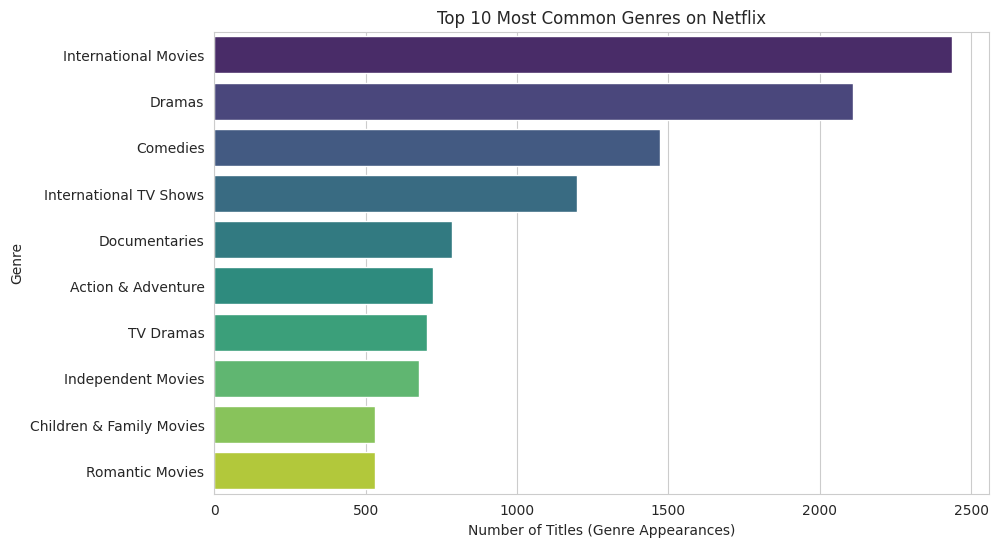

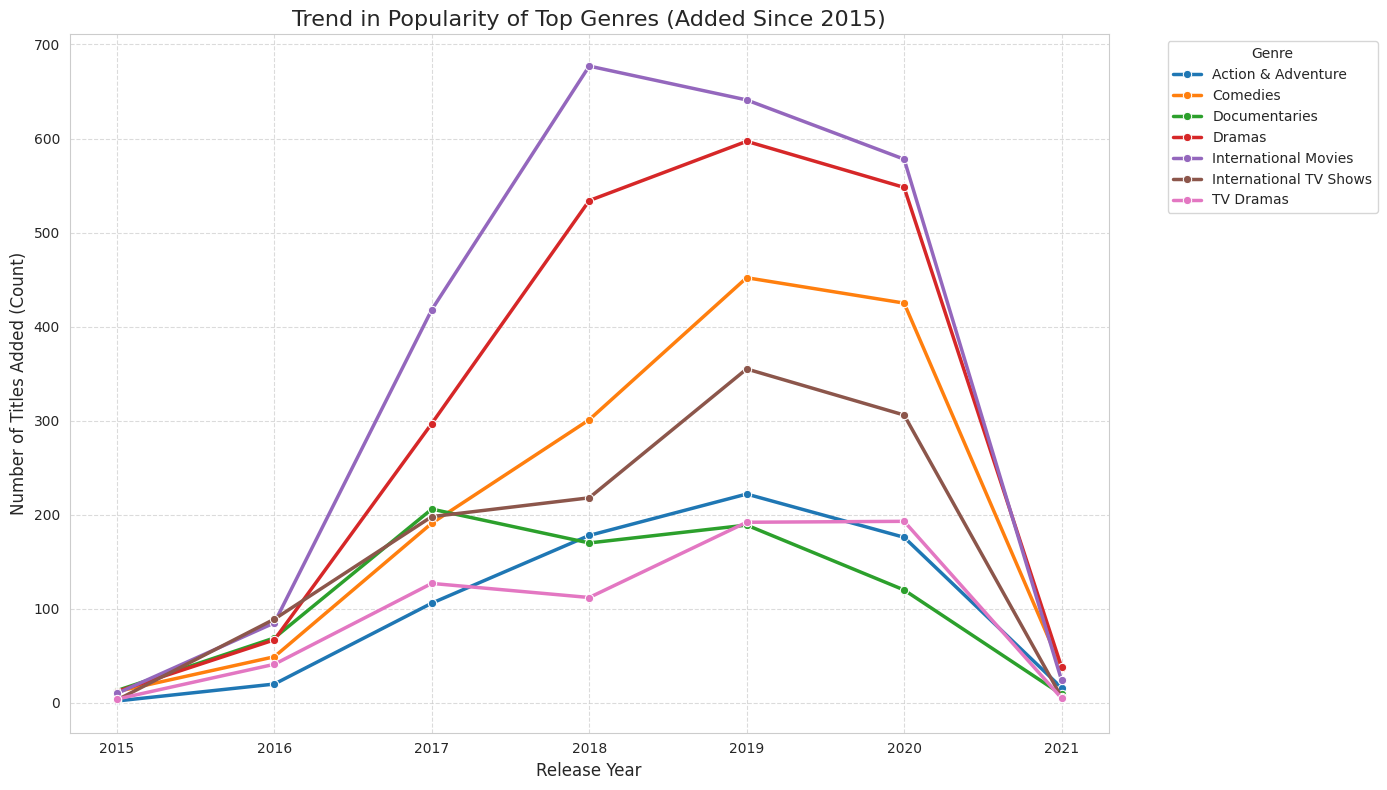


--- Filtering Example: Trends in 'International Movies' ---
| Release_Year   | Genre                | Count   |
|:---------------|:---------------------|:--------|
| 2017           | International Movies | 418     |
| 2018           | International Movies | 677     |
| 2019           | International Movies | 641     |
| 2020           | International Movies | 578     |
| 2021           | International Movies | 24      |


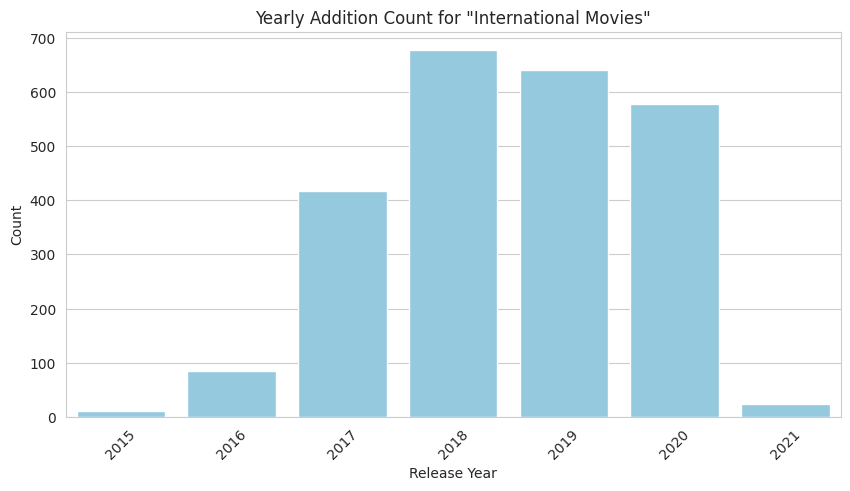


--- Data Summary for Next Steps ---
Remaining NaN counts in key columns (post-Release_Date cleaning):
|          | 0    |
|:---------|:-----|
| Director | 2378 |
| Cast     | 718  |
| Country  | 506  |
| Rating   | 7    |

Ready to proceed to Objective 3: Country-wise Contributions.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for better visualization aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (12, 6)

# --- 1. Data Loading (Assuming file is uploaded to Colab/Jupyter) ---

# Load the dataset
try:
    df = pd.read_csv("Netflix Dataset (1).csv")
    print("--- Data Loaded Successfully ---")
except FileNotFoundError:
    print("Error: 'Netflix Dataset (1).csv' not found. Please ensure the file is uploaded.")
    exit()

# --- 2. Data Preprocessing and Cleaning (Building on Objective 1 steps) ---

# Handling missing values in Release_Date (as discussed and approved)
# We drop rows with missing dates as they cannot be used for time-based trend analysis.
df_cleaned = df.dropna(subset=['Release_Date']).copy()

# Convert 'Release_Date' to datetime objects and extract 'Release_Year'
df_cleaned['Release_Date'] = pd.to_datetime(df_cleaned['Release_Date'], errors='coerce')
# Handle potential NaT values after conversion by using a nullable integer type
df_cleaned['Release_Year'] = df_cleaned['Release_Date'].dt.year.astype('Int64')

# Displaying the state of the cleaned dataset
print(f"\nTotal records for trend analysis: {len(df_cleaned)}")
print(f"Data spans from {df_cleaned['Release_Year'].min()} to {df_cleaned['Release_Year'].max()}")

# --- 3. Objective 2: Genre Trends Analysis ---

print("\n--- Starting Genre Trends Analysis (Objective 2) ---")

# Step 3.1: Deconstruct the 'Type' column (genres)
# The 'Type' column needs to be split and expanded into individual rows per genre.

# Separate the values in the 'Type' column by the delimiter ', '
# The explode function creates a new row for every genre listed in the original 'Type' column.
genre_df = df_cleaned.assign(Type=df_cleaned['Type'].str.split(', ')).explode('Type')

# Rename the split column for clarity
genre_df.rename(columns={'Type': 'Genre'}, inplace=True)

# Step 3.2: Calculate Overall Top Genres (EDA)
# Count the occurrences of each unique genre
genre_counts = genre_df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
top_n = 10
top_genres = genre_counts.head(top_n)

print(f"\nTop {top_n} Most Common Genres (Overall):")
print(top_genres.to_markdown(index=False, numalign="left", stralign="left"))

# Visualization: Overall Top Genres
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Genre', data=top_genres, palette='viridis')
plt.title(f'Top {top_n} Most Common Genres on Netflix')
plt.xlabel('Number of Titles (Genre Appearances)')
plt.ylabel('Genre')
plt.show() #

# Step 3.3: Analyze Genre Popularity Over Time

# Filter out years before a significant content ramp-up (e.g., 2015) for cleaner trend visualization
min_trend_year = 2015
genre_trend_df = genre_df[genre_df['Release_Year'] >= min_trend_year]

# Group by year and genre, then count
yearly_genre_count = genre_trend_df.groupby(['Release_Year', 'Genre']).size().reset_index(name='Count')

# Filter for the top N most frequent genres across the entire period (excluding years before 2015)
# This ensures we are plotting relevant trends
top_genres_to_plot = genre_trend_df['Genre'].value_counts().head(7).index.tolist()
yearly_genre_trend = yearly_genre_count[yearly_genre_count['Genre'].isin(top_genres_to_plot)]

# Visualization: Genre Popularity Over Time (Line Plot)
plt.figure(figsize=(14, 8))
sns.lineplot(data=yearly_genre_trend, x='Release_Year', y='Count', hue='Genre', marker='o', linewidth=2.5)

# Enhance plot features
plt.title(f'Trend in Popularity of Top Genres (Added Since {min_trend_year})', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles Added (Count)', fontsize=12)
plt.xticks(yearly_genre_trend['Release_Year'].unique())
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() # [Image of a line plot showing the yearly trend of the top 7 Netflix genres.]

# --- 4. Filtering Example: How to filter for a specific trend ---

print("\n--- Filtering Example: Trends in 'International Movies' ---")

# Filter for all content classified as 'International Movies'
international_movies_trend = yearly_genre_count[yearly_genre_count['Genre'] == 'International Movies']

print(international_movies_trend.tail(5).to_markdown(index=False, numalign="left", stralign="left"))

# Visualization for a single genre trend
plt.figure(figsize=(10, 5))
sns.barplot(x='Release_Year', y='Count', data=international_movies_trend, color='skyblue')
plt.title('Yearly Addition Count for "International Movies"')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# --- 5. Data Summary (For context on what data is available for Objective 3) ---

print("\n--- Data Summary for Next Steps ---")
print("Remaining NaN counts in key columns (post-Release_Date cleaning):")
print(df_cleaned[['Director', 'Cast', 'Country', 'Rating']].isna().sum().to_markdown(numalign="left", stralign="left"))

print("\nReady to proceed to Objective 3: Country-wise Contributions.")